## Mridangam stroke type classification task using Essentia Music Extractor.

In [1]:
#If not installed, install Essentia and compiam.
# This cell is for running the notebook in Colab
import importlib.util
if importlib.util.find_spec('essentia') is None:
    %pip install essentia

if importlib.util.find_spec('compiam') is None:
    %pip install compiam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.6 MB 24.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 1.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 217 kB 74.0 MB/s 
     |████████████████████████████████| 3.0 MB 61.5 MB/s 
     |████████████████████████████████| 14.0 MB 70.6 MB/s 
     |████████████████████████████████| 133 kB 76.1 MB/s 
     |████████████████████████████████| 90 kB 11.0 MB/s 
     |████████████████████████████████| 129 kB 70.6 MB/s 
     |████████████████████████████████| 14.9 MB 69.7 MB/s 
     |████████████████████████████████| 24.9 MB 1.2 MB/s 
     |████████████████████████████████| 792 kB 55.5 MB/s 
     |██████████████████████████████

In [2]:
#Basic imports
import os
import matplotlib.pyplot as plt
import numpy as np

# Imports to support MIR
import essentia.standard as ess
import pandas as pd
import compiam

In [3]:
compiam.list_datasets()

['saraga_carnatic',
 'saraga_hindustani',
 'mridangam_stroke',
 'four_way_tabla',
 'compmusic_carnatic_rhythm',
 'compmusic_hindustani_rhythm',
 'compmusic_raga',
 'compmusic_indian_tonic']

In [4]:
#Import Mridangam Stroke Dataset
mridangam_stroke = compiam.load_dataset('mridangam_stroke', data_home=".")

In [5]:
#This cell downloads and validates the mridangam dataset
mridangam_stroke.download()  # download the dataset
mridangam_stroke.validate()  # validate that all the expected files are there

124MB [06:40, 325kB/s]                           
100%|██████████| 6976/6976 [00:00<00:00, 7512.64it/s]


({'tracks': {}}, {'tracks': {}})

In [6]:
mridangam_ids = mridangam_stroke.track_ids  # Load Mridangam IDs
mridangam_data = mridangam_stroke.load_tracks()  # Load Mridangam data

mridangam_data[mridangam_ids[0]]  # Visualize a single track

Track(
  audio_path="./mridangam_stroke_1.5/B/224030__akshaylaya__bheem-b-001.wav",
  stroke_name="bheem",
  tonic="B",
  track_id="224030",
  audio: The track's audio

        Returns,
)

In [7]:
mridangam_data

{'224030': Track(
   audio_path="./mridangam_stroke_1.5/B/224030__akshaylaya__bheem-b-001.wav",
   stroke_name="bheem",
   tonic="B",
   track_id="224030",
   audio: The track's audio
 
         Returns,
 ), '224031': Track(
   audio_path="./mridangam_stroke_1.5/B/224031__akshaylaya__bheem-b-002.wav",
   stroke_name="bheem",
   tonic="B",
   track_id="224031",
   audio: The track's audio
 
         Returns,
 ), '224032': Track(
   audio_path="./mridangam_stroke_1.5/B/224032__akshaylaya__bheem-b-003.wav",
   stroke_name="bheem",
   tonic="B",
   track_id="224032",
   audio: The track's audio
 
         Returns,
 ), '224033': Track(
   audio_path="./mridangam_stroke_1.5/B/224033__akshaylaya__bheem-b-004.wav",
   stroke_name="bheem",
   tonic="B",
   track_id="224033",
   audio: The track's audio
 
         Returns,
 ), '224034': Track(
   audio_path="./mridangam_stroke_1.5/B/224034__akshaylaya__bheem-b-005.wav",
   stroke_name="bheem",
   tonic="B",
   track_id="224034",
   audio: The tr

In [ ]:
# Get complete list of different strokes
stroke_names = []
for i in mridangam_ids:
    stroke_names.append(mridangam_data[i].stroke_name)
stroke_names = np.unique(stroke_names)

print(stroke_names)

['bheem' 'cha' 'dheem' 'dhin' 'num' 'ta' 'tha' 'tham' 'thi' 'thom']


In [ ]:
# You can create a dictionary using stroke type as keys
stroke_dict = {item: [] for item in stroke_names}
for i in mridangam_ids:
    stroke_dict[mridangam_data[i].stroke_name].append(mridangam_data[i].audio_path)

stroke_dict['bheem'][0]

'./mridangam_stroke_1.5/B/224030__akshaylaya__bheem-b-001.wav'

### EXAMPLE: Working with large datasets

In [ ]:
saraga_carnatic = compiam.load_dataset('saraga_carnatic', data_home=".")
saraga_carnatic

The saraga_carnatic dataset
----------------------------------------------------------------------------------------------------


Call the .cite method for bibtex citations.
----------------------------------------------------------------------------------------------------


Saraga Track Carnatic class

    Args:
        track_id (str): track id of the track
        data_home (str): Local path where the dataset is stored. default=None
            If `None`, looks for the data in the default directory, `~/mir_datasets`

    Attributes:
        audio_path (str): path to audio file
        audio_ghatam_path (str): path to ghatam audio file
        audio_mridangam_left_path (str): path to mridangam left audio file
        audio_mridangam_right_path (str): path to mridangam right audio file
        audio_violin_path (str): path to violin audio file
        audio_vocal_s_path (str): path to vocal s audio file
        audio_vocal_pat (str): path to vocal pat audio file
        ctonic_path (

In [ ]:
#This cell downloads and validates the mridangam dataset
# saraga_carnatic.download()  download the dataset
# saraga_carnatic.validate()  validate that all the expected files are there

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
saraga_carnatic = compiam.load_dataset('saraga_carnatic', data_home="./content/drive/MyDrive/CompMusic/Saraga Dataset")

In [ ]:
track = saraga_carnatic.choice_track()
track

Track(
  audio_ghatam_path=None,
  audio_mridangam_left_path=None,
  audio_mridangam_right_path=None,
  audio_path="...atic/Vignesh Ishwar at Nada Inbam by Vignesh Ishwar/Amba Kamakshi/Vignesh Ishwar - Amba Kamakshi.mp3",
  audio_violin_path=None,
  audio_vocal_path=None,
  audio_vocal_s_path=None,
  ctonic_path="...gnesh Ishwar at Nada Inbam by Vignesh Ishwar/Amba Kamakshi/Vignesh Ishwar - Amba Kamakshi.ctonic.txt",
  metadata_path="...tic/Vignesh Ishwar at Nada Inbam by Vignesh Ishwar/Amba Kamakshi/Vignesh Ishwar - Amba Kamakshi.json",
  phrases_path="...war at Nada Inbam by Vignesh Ishwar/Amba Kamakshi/Vignesh Ishwar - Amba Kamakshi.mphrases-manual.txt",
  pitch_path="...ignesh Ishwar at Nada Inbam by Vignesh Ishwar/Amba Kamakshi/Vignesh Ishwar - Amba Kamakshi.pitch.txt",
  pitch_vocal_path=None,
  sama_path="... Ishwar at Nada Inbam by Vignesh Ishwar/Amba Kamakshi/Vignesh Ishwar - Amba Kamakshi.sama-manual.txt",
  sections_path="...r at Nada Inbam by Vignesh Ishwar/Amba Kamakshi/Vi

In [ ]:
audio, sr = track.audio
audio = audio.sum(axis=0) / 2

audio_short = audio[:30*sr]

import IPython.display as ipd
ipd.Audio(audio_short, rate=sr)

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: ignored

### Preprocessing of raw data: Segmentation, splitting, alignment,... 

Plot waveforms of random samples of each stroke type...


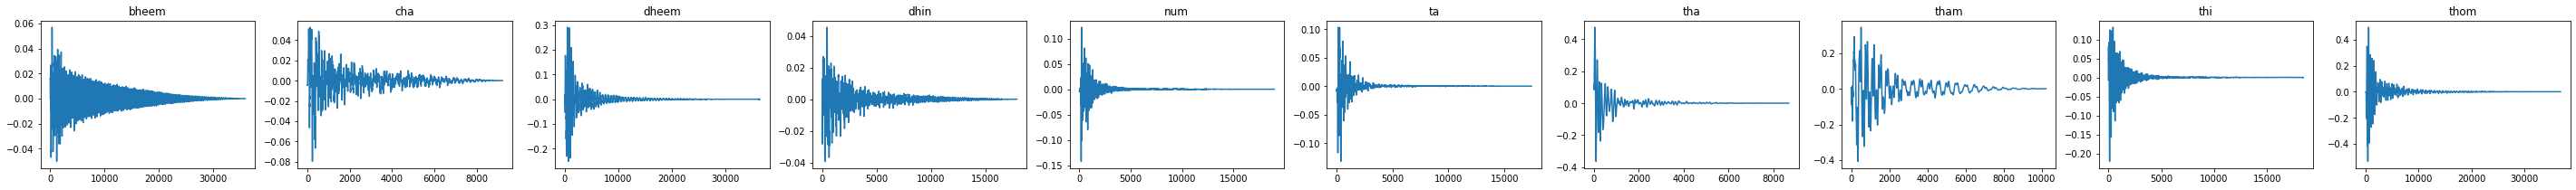

In [ ]:
# Raw-data preprocess analysis parameters
_, fs = mridangam_data[mridangam_ids[0]].audio

num_strokes = len(stroke_dict.keys())
print("Plot waveforms of random samples of each stroke type...")
plt.figure(1, figsize=(5 * num_strokes, 3))
file_ind_inlist = 0 # 0: let's take the first file in the list for sample plots
for i, stroke in enumerate(stroke_dict.keys()):
    sample_file = stroke_dict[stroke][file_ind_inlist]
    x = ess.MonoLoader(filename = sample_file, sampleRate = fs)()
    
    plt.subplot(1,num_strokes,(i+1))
    plt.plot(x)
    plt.title(stroke)

While common preprocessing steps (such as amplitude normalisation) exist, there is often some dataset and task specific preprocessing tasks required for grouping, cleaning, and format change. 

In the downloaded dataset, recordings include a sequence of isolated notes played in sequence which could be split into isolated notes. We would like to investigate the option of splitting using a fixed energy threshold (which would help us seperate notes using the silence regions). Let's define a function to perform this operation and visualize some samples to observe the effectiveness of it.

In [ ]:
# Raw-data preprocess analysis parameters
windowSize = 1024
hopSize = 512
NRG_threshold_ratio = 0.005 #threshold expressed as ratio with respect to the maximum value
#Let's put in a container to be able to use as a single argument in function calls
params = {"fs":fs, "windowSize":windowSize, "hopSize":hopSize, "NRG_threshold_ratio": NRG_threshold_ratio}

NameError: ignored

In [ ]:
#Function definition
def split_file(filename, params):
    '''Function to define split boundaries based on a fixed energy threshold
    '''
    x = ess.MonoLoader(filename = filename, sampleRate = fs)()
    NRG = [];
    #Main windowing and feature extraction loop
    for frame in ess.FrameGenerator(x, frameSize = windowSize, hopSize = hopSize, startFromZero = True):
        NRG.append(ess.Energy()(frame))
    NRG = np.array(NRG)
    NRG = NRG / np.max(NRG)
    
    #Applying energy threshold to decide wave split boundaries
    split_decision_func = np.zeros_like(NRG)
    split_decision_func[NRG > NRG_threshold_ratio] = 1
    #Setting segment boundaries
    #Inserting a zero at the beginning since we will decide the transitions using a diff function
    split_decision_func = np.insert(split_decision_func, 0, 0)
    diff_split_decision = np.diff(split_decision_func)
    #Start indexes: transition from 0 to 1
    start_indexes = np.nonzero(diff_split_decision > 0)[0] * hopSize
    #Stop indexes: transition from 1 to 0
    stop_indexes = np.nonzero(diff_split_decision < 0)[0] * hopSize
    return (x, NRG, split_decision_func, start_indexes, stop_indexes)

Let's now apply this method to a particular set of examples to visualise the performance.

Sample plots for waveform versus energy and splits based on energy threshold


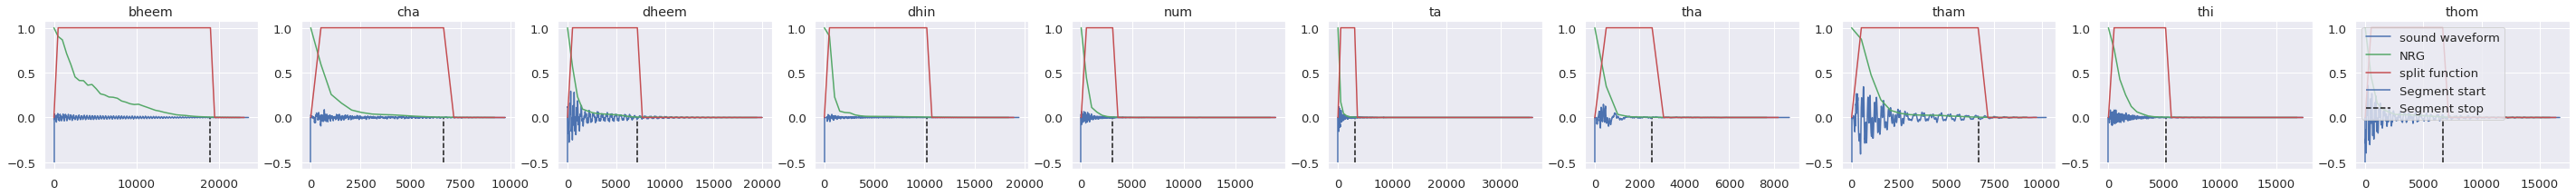

In [ ]:
num_strokes = len(stroke_names)
print("Sample plots for waveform versus energy and splits based on energy threshold")

file_indexes = [1]
for file_ind_inlist in file_indexes:
    plt.figure(file_ind_inlist, figsize=(5 * num_strokes, 3))
    for i, stroke in enumerate(stroke_dict.keys()):
        sample_file = stroke_dict[stroke][file_ind_inlist]
        (x, NRG, split_decision_func, start_indexes, stop_indexes) = split_file(sample_file, params)
        #Plotting functions for checking the split decisions
        plt.subplot(1,num_strokes,(i+1))
        plt.title(stroke)
        plt.plot(x, label = 'sound waveform')
        plt.plot(np.arange(NRG.size) * hopSize, NRG, 'g', label = 'NRG')
        plt.plot(np.arange(split_decision_func.size) * hopSize, split_decision_func,'r', label = 'split function')
        plt.vlines(start_indexes, ymin = -0.5, ymax = 0, colors='b', linestyles='solid', label='Segment start')
        plt.vlines(stop_indexes, ymin = -0.5, ymax = 0, colors='k', linestyles='dashed', label='Segment stop')

plt.legend(loc="best");


In [ ]:
main_data_dir = './segments/'
if not os.path.exists(main_data_dir): #creating the directory
    os.mkdir(main_data_dir)

segment_files = []
for stroke, files in stroke_dict.items():
    for sample_file in files:
        #Get file id
        stroke_id =  sample_file.split('__')[-1].split('.')[0]
        x = ess.MonoLoader(filename = sample_file, sampleRate = fs)()
        (x, NRG, split_decision_func, start_indexes, stop_indexes) = split_file(sample_file, params)
        #Croping segments
        for start, stop in zip(start_indexes, stop_indexes):
            x_seg = x[start: stop]
            #Final check for amplitude (to avoid silent segments selection due to noise in split function)
            if(np.max(np.abs(x_seg)) > 0.05):
                #Amplitude normalisation
                x_seg = x_seg / np.max(np.abs(x_seg))
                filename = os.path.join(main_data_dir, stroke_id + '.wav')
                ess.MonoWriter(filename = filename, format = 'wav', sampleRate = fs)(x_seg)
                segment_files.append(filename)

print(len(segment_files),'segment files created')

6854 segment files created


## Feature extraction 

Let's compute a list of common features for each of the files and form a data frame including features and categories. We will be using the [MusicExtractor function of Essentia](https://essentia.upf.edu/documentation/reference/std_MusicExtractor.html) that would compute a large number of features commonly used in MIR literature. 

Essentia-MusicExtractor extracts a large number of features. For simplicity, let's only keep low-level descriptors which are represented with a single scalar value as our feature set and discard other features.

In [ ]:
import essentia.standard as ess
# Print descriptors to be considered
features, features_frames = ess.MusicExtractor(lowlevelSilentFrames='drop',
                                                      lowlevelFrameSize = 2048,
                                                      lowlevelHopSize = 1024,
                                                      lowlevelStats = ['mean', 'stdev'])(mridangam_data['224030'].audio_path)

scalar_lowlevel_descriptors = [descriptor for descriptor in features.descriptorNames() if 'lowlevel' in descriptor and isinstance(features[descriptor], float)]
print("Subset of features to be considered:\n",scalar_lowlevel_descriptors)

Subset of features to be considered:
 ['lowlevel.average_loudness', 'lowlevel.barkbands_crest.mean', 'lowlevel.barkbands_crest.stdev', 'lowlevel.barkbands_flatness_db.mean', 'lowlevel.barkbands_flatness_db.stdev', 'lowlevel.barkbands_kurtosis.mean', 'lowlevel.barkbands_kurtosis.stdev', 'lowlevel.barkbands_skewness.mean', 'lowlevel.barkbands_skewness.stdev', 'lowlevel.barkbands_spread.mean', 'lowlevel.barkbands_spread.stdev', 'lowlevel.dissonance.mean', 'lowlevel.dissonance.stdev', 'lowlevel.dynamic_complexity', 'lowlevel.erbbands_crest.mean', 'lowlevel.erbbands_crest.stdev', 'lowlevel.erbbands_flatness_db.mean', 'lowlevel.erbbands_flatness_db.stdev', 'lowlevel.erbbands_kurtosis.mean', 'lowlevel.erbbands_kurtosis.stdev', 'lowlevel.erbbands_skewness.mean', 'lowlevel.erbbands_skewness.stdev', 'lowlevel.erbbands_spread.mean', 'lowlevel.erbbands_spread.stdev', 'lowlevel.hfc.mean', 'lowlevel.hfc.stdev', 'lowlevel.loudness_ebu128.integrated', 'lowlevel.loudness_ebu128.loudness_range', 'lowlev

Running musicextractor for all files, keeping a subset of features, writing to an output file: data.csv

In [ ]:
# Extracting features and writing in data.csv file in the segments folder
#  each line in the data.csv file represents a sample with features and the class information as the last element
data_file = './data.csv'
file_count = 0
with open(data_file, 'w') as writer:
    #adding column names as the first line in csv
    line2write = ','.join(scalar_lowlevel_descriptors + ['stroke']).replace('lowlevel.','') + '\n'
    writer.write(line2write)
    for filename in segment_files:
        file_count +=1
        if file_count % 20 == 0: #print name of a file every 20 files
            print(file_count, "files processed, current file: ", filename)

        #Compute and write features for file
        features, features_frames = ess.MusicExtractor(lowlevelSilentFrames='drop',
                                                      lowlevelFrameSize = 2048,
                                                      lowlevelHopSize = 1024,
                                                      lowlevelStats = ['mean', 'stdev'])(filename)
        selected_features = [features[descriptor] for descriptor in scalar_lowlevel_descriptors]
        label = filename.split('/')[-1].split('.')[0].split('-')[0]
        line2write = str(selected_features)[1:-1] + ',' + label + '\n'
        writer.write(line2write)
print("A total of ", file_count, "files processed")

20 files processed, current file:  ./segments/bheem-dsh-014.wav
40 files processed, current file:  ./segments/bheem-e-019.wav
60 files processed, current file:  ./segments/cha-b-015.wav
80 files processed, current file:  ./segments/cha-b-037.wav
100 files processed, current file:  ./segments/cha-c-002.wav
120 files processed, current file:  ./segments/cha-c-023.wav
140 files processed, current file:  ./segments/cha-c-045.wav
160 files processed, current file:  ./segments/cha-csh-022.wav
180 files processed, current file:  ./segments/cha-csh-052.wav
200 files processed, current file:  ./segments/cha-d-019.wav
220 files processed, current file:  ./segments/cha-d-040.wav
240 files processed, current file:  ./segments/cha-dsh-001.wav
260 files processed, current file:  ./segments/cha-dsh-021.wav
280 files processed, current file:  ./segments/cha-dsh-042.wav
300 files processed, current file:  ./segments/cha-e-013.wav
320 files processed, current file:  ./segments/cha-e-033.wav
340 files pr

In [ ]:
#Read data with pandas module
data = pd.read_csv(data_file)

#Plot first lines of our data
data.head()

,average_loudness,barkbands_crest.mean,barkbands_crest.stdev,barkbands_flatness_db.mean,barkbands_flatness_db.stdev,barkbands_kurtosis.mean,barkbands_kurtosis.stdev,barkbands_skewness.mean,barkbands_skewness.stdev,barkbands_spread.mean,...,spectral_rolloff.stdev,spectral_skewness.mean,spectral_skewness.stdev,spectral_spread.mean,spectral_spread.stdev,spectral_strongpeak.mean,spectral_strongpeak.stdev,zerocrossingrate.mean,zerocrossingrate.stdev,stroke
0,0.990684,15.045286,1.854457,0.372195,0.078171,155.698425,116.191475,7.763120,2.870029,1.459613,...,104.330238,4.505210,0.720354,3449997.25,2149744.25,0.623849,0.403493,0.008395,0.002812,bheem
1,0.990684,14.898280,2.280415,0.391228,0.083327,133.322464,80.732315,6.428464,1.788766,1.242456,...,54.856857,5.026468,0.800210,3145256.00,2228093.25,0.763095,0.469566,0.006445,0.001386,bheem
2,0.990684,14.472402,2.531276,0.355560,0.088243,104.285118,69.695938,5.909654,2.103197,1.706020,...,67.465721,4.368255,0.802401,4535478.50,5375153.00,0.743537,0.436122,0.005964,0.001557,bheem
3,0.990684,15.161849,1.408289,0.372373,0.072589,196.814804,126.745834,8.861809,3.526606,1.458768,...,93.040909,4.677685,0.927602,3632668.25,3444228.00,0.574670,0.406087,0.008301,0.001870,bheem
4,0.990684,17.659487,2.969297,0.421759,0.078647,202.105255,124.588799,7.508127,2.379027,0.917102,...,41.178917,4.705696,1.029640,4010331.75,5413299.00,0.739857,0.500096,0.007650,0.003042,bheem


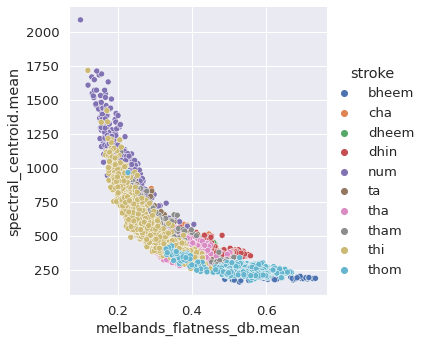

In [ ]:
# Take two random features and plot the sample points
import seaborn as sns
sns.relplot(x = "melbands_flatness_db.mean", y = "spectral_centroid.mean", hue = "stroke", data = data);

### Preprocessing of the features


In [ ]:
data_modif = data.copy()

#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data_modif.iloc[:,:84] = min_max_scaler.fit_transform(data.iloc[:,:84].values)

In [ ]:
# Checking if our data is balanced (if not, we should balance it to prevent our model to be baised)
data_modif.stroke.value_counts()

thi      2161
tha      1146
ta        921
thom      613
num       480
dheem     450
dhin      386
tham      357
cha       294
bheem      46
Name: stroke, dtype: int64

In [ ]:
# Here we didn't pick the lowest number, 49 for bheem, which is too small. Instead, we choose the 330 of "cha"
min_number = data_modif.stroke.value_counts()['cha']
thi_data = data_modif[data_modif.stroke == 'thi'].sample(n = min_number, random_state = 42)
tha_data = data_modif[data_modif.stroke == 'tha'].sample(n = min_number)
ta_data = data_modif[data_modif.stroke == 'ta'].sample(n = min_number)
thom_data = data_modif[data_modif.stroke == 'thom'].sample(n = min_number)
num_data = data_modif[data_modif.stroke == 'num'].sample(n = min_number)
dhin_data = data_modif[data_modif.stroke == 'dhin'].sample(n = min_number)
dheem_data = data_modif[data_modif.stroke == 'dheem'].sample(n = min_number)
tham_data = data_modif[data_modif.stroke == 'tham'].sample(n = min_number)
cha_data = data_modif[data_modif.stroke == 'cha'].sample(n = min_number)
bheem_data = data_modif[data_modif.stroke == 'bheem']
#Merging after downsampling
data_modif = pd.concat([thi_data, tha_data, ta_data, thom_data, num_data, dhin_data, dheem_data, tham_data, cha_data, bheem_data])
#Checking the balance again
data_modif.stroke.value_counts()

thi      294
tha      294
ta       294
thom     294
num      294
dhin     294
dheem    294
tham     294
cha      294
bheem     46
Name: stroke, dtype: int64

## Supervised learning approach (Support Vector Machines)

In [ ]:
# Input values put in a matrix, there are 84 features
X = data_modif.iloc[:,:84].values 
# Creating output values
data_modif.stroke = pd.Categorical(data_modif.stroke)  # convert to categorical data
y = np.array(data_modif.stroke.cat.codes)  # create label encoded outputs
# Print the first sample
print("Features of the first sample: ", X[0])
print("Class of the first sample: ", y[0])

Features of the first sample:  [0.         0.166698   0.19569331 0.19187297 0.21813169 0.00518465
 0.00277292 0.11074965 0.03389682 0.29261579 0.27711623 0.61019944
 0.44115562 0.         0.12703363 0.10249302 0.25651656 0.18245848
 0.0097736  0.00827198 0.19769223 0.12555338 0.43349396 0.10128644
 0.1764713  0.16102989 0.32257256 0.         0.32257256 0.
 0.27492107 0.         0.18542481 0.1401916  0.25002377 0.24852136
 0.03578907 0.04781621 0.32291146 0.21155392 0.30302373 0.31848565
 0.79855295 0.2726436  0.         0.         1.         0.
 0.51428571 0.97979593 0.22318311 0.27022508 0.45163884 0.45208968
 0.80464942 0.14947098 0.20459309 0.14316503 0.02326046 0.02293771
 0.00932193 0.01001569 0.16637883 0.19816178 0.23642542 0.23819592
 0.75758888 0.23539498 0.32227111 0.38837767 0.0852408  0.05418311
 0.28644568 0.31019266 0.25744742 0.10386354 0.20940971 0.11932329
 0.20104468 0.10218039 0.15530405 0.10404512 0.41846153 0.47426487]
Class of the first sample:  8


In [ ]:
# Let's split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Check sizes of input and output vectors
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (1803, 84) , Size of train output vector:  (1803,)
Size of test features matrix:  (889, 84) , Size of test output vector:  (889,)


In [ ]:
# Define and train the model

from sklearn import svm
clf = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))

# Fit model with training data
clf.fit(X_train, y_train)

# Predict classes of test samples
y_pred = clf.predict(X_test)

In [ ]:
# Test the model
# Let's check for each sample in the test set if prediction matches the true class information
y_test == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,

In [ ]:
# Data is balanced, so you can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

accuracy:  0.9133858267716536


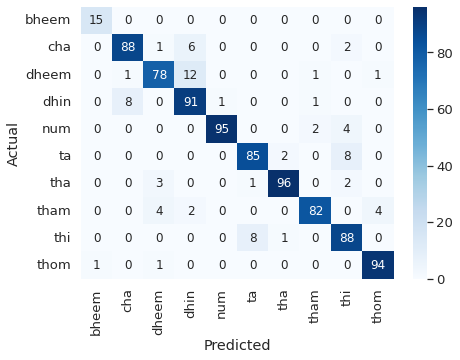

In [ ]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(data_modif.stroke)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

## Unsupervised learning approach (Neural Network)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Let's start by splitting our data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

# ..and apply normalisation
scaler = StandardScaler().fit(X_train_val)
norm_x_train_val = scaler.transform(X_train_val)
norm_x_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train_val_onehot = onehot_encoder.fit_transform(y_train_val.reshape(len(y_train_val), 1))
y_test_onehot = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print("One-hot encoded y_train_val shape = ", y_train_val_onehot.shape)
print("One-hot encoded y_test shape = ", y_test_onehot.shape)

In [ ]:
from keras.models import Sequential
from keras import layers

def compose_model(num_features):
    
    model = Sequential()

    # Input layer 
    model.add(layers.BatchNormalization(name='InputLayer', input_shape=(num_features,)))
    
    # 1. hidden layer
    model.add(layers.Dense(name='HiddenLayer_1', units = 40))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('tanh'))
    model.add(layers.Dropout(0.3))

    # 2. hidden layer
    model.add(layers.Dense(name='HiddenLayer_2', units = 20))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))

    # Output layer
    model.add(layers.Dense(name='Output_layer', units = 10))
    model.add(layers.Activation('sigmoid'))
    
    return model

model = compose_model(X_train_val.shape[1])

In [ ]:
model.summary()  # Plot summary of the model

In [ ]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
summary = model.fit(X_train_val, y_train_val_onehot, batch_size = 50, epochs = 250, validation_split=0.2, verbose=0)

In [ ]:
score = model.evaluate(X_test, y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# summarize history for accuracy
plt.plot(summary.history['accuracy'])
plt.plot(summary.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()